# Тест по теме "Корреляция".

In [2]:
import pandas as pd

In [3]:
games = pd.read_csv('data/ScrabbleGames.csv')

#### 1. Сгруппируйте датафрейм по переменной tourneyid, затем определите тип взаимосвязи между средними значениями переменных winnerscore и winnernewrating.
*Ответ: связь заметная обратная*

In [4]:
winner_score_rating =  games.groupby('tourneyid')[['winnerscore', 'winnernewrating']].mean()
winner_score_rating['winnerscore'].corr(winner_score_rating['winnernewrating'])

-0.6040132147335744

#### 2. Укажите, верно ли следующее утверждение: очки, набранные победителем, напрямую и сильно зависят от очков, набранных проигравшим. Сгруппируйте датафрейм по переменной tourneyid и посмотрите на средние значения интересующих нас переменных.

*Ответ: утверждение верно*

In [5]:
winner_loser_score =  games.groupby('tourneyid')[['winnerscore', 'loserscore']].mean()
winner_loser_score['winnerscore'].corr(winner_loser_score['loserscore'])

0.9999382016001124

#### 3. Между какими переменными можно найти интерпретируемый коэффициент корреляции? Выберите один верный ответ.
*Ответ: winnerpos и loserpos.*

*Объяснение: id участников и игр интерпретируются скорее как категориальные переменные (хотя они и создают некоторый порядок), которые вряд ли как-либо влияют на игру, места проигравших или победивших в турнире, в свою очередь, вполне могут иметь корреляцию, так как за места ведётся конкуренция.*

In [28]:
games[['gameid', 'tie', 'winnerid', 'loserid', 'winnerpos', 'loserpos']].corr()

,gameid,tie,winnerid,loserid,winnerpos,loserpos
gameid,1.000000,0.011730,0.226863,0.250447,0.026757,0.031006
tie,0.011730,1.000000,-0.018818,0.012602,0.011076,-0.002666
winnerid,0.226863,-0.018818,1.000000,0.190702,0.026496,-0.011044
loserid,0.250447,0.012602,0.190702,1.000000,-0.005181,0.025844
winnerpos,0.026757,0.011076,0.026496,-0.005181,1.000000,0.772008
loserpos,0.031006,-0.002666,-0.011044,0.025844,0.772008,1.000000


#### 4. Что можно сказать по графику о взаимосвязи переменных winnerscore и winnernewrating?
*Ответ: Связи практически нет*

c:\Users\Galenfea\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='winnernewrating', ylabel='winnerscore'>

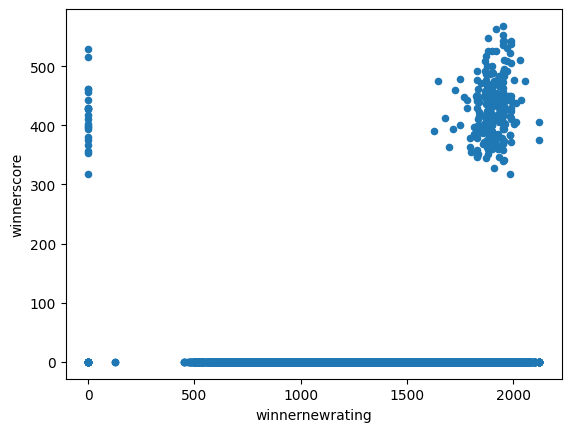

In [ ]:
winner_score_rating = games[['winnerscore', 'winnernewrating']]
winner_score_rating.plot('winnernewrating', 'winnerscore', kind='scatter')

#### 5. Сгруппируйте датафрейм по переменной tourneyid, затем рассчитайте коэффициент корреляции между средними значениями переменных winnernewrating и losernewrating. Введите ответ в виде десятичной дроби, округлите до двух знаков после запятой (например, 0.23); если связь обратная, не забудьте указать минус перед числом.

In [ ]:
winner_loser_newrating = games.groupby('tourneyid')[['winnernewrating', 'losernewrating']].mean()

round(winner_loser_newrating['winnernewrating'].corr(winner_loser_newrating['losernewrating']), 2)

0.98

#### 6. Выберите только первые раунды турнира, сгруппируйте датафрейм по переменной tourneyid, затем рассчитайте коэффициент корреляции между [средними значениями переменных?] winnerscore и loserscore. Введите ответ в виде десятичной дроби, [округлив?] до двух знаков после запятой (например, 0.29); если связь обратная, не забудьте указать минус перед числом.

In [34]:
first_rounds = games[games['round'] == 1].groupby('tourneyid')[['winnerscore', 'loserscore']].mean()

round(first_rounds['winnerscore'].corr(first_rounds['loserscore']), 2)

1.0

#### 7. Укажите, верно ли следующее утверждение: переменная tie не влияет на характер взаимосвязи между переменными winnernewrating и losernewrating. Сгруппируйте датафрейм по переменной tourneyid, затем рассчитайте коэффициент корреляции между средними значениями указанных переменных.
*Ответ: утверждение верно.*

In [87]:
tie_frame = games.groupby(['tourneyid', 'tie'], as_index=False)[['winnernewrating', 'losernewrating']].mean()
# Сгруппировав по tourneyid, tie и избавившись от мультииндексности мы получили возможность
# выявить коэффициент корреляции для средних за турнир значений переменных winnernewrating и losernewrating
# для tie == 0 и для tie == 1
print(tie_frame[tie_frame['tie'] == 0]['winnernewrating'].corr(tie_frame['losernewrating']))
print(tie_frame[tie_frame['tie'] == 1]['winnernewrating'].corr(tie_frame['losernewrating']))

0.9782555275896676
0.9233027219958259


#### 8. Выберите самого часто встречающегося победителя (столбец winnername). Сгруппируйте датафрейм по переменной tourneyid, затем рассчитайте коэффициент корреляции между средними значениями переменных winnerscore и winneroldrating. Введите ответ в виде десятичной дроби, округлите до двух знаков после запятой; если связь обратная, не забудьте указать минус перед числом.

In [43]:
most_frequent_winner = games['winnername'].value_counts().index[0]
print(most_frequent_winner)
round(
    games[
        games['winnername'] == most_frequent_winner
    ].groupby('tourneyid')[['winnerscore', 'winneroldrating']].mean().corr(),
    2
)

Lester Schonbrun


,winnerscore,winneroldrating
winnerscore,1.00,0.05
winneroldrating,0.05,1.00


#### 9. Укажите, верно ли следующее утверждение: характер взаимосвязи (прямая или обратная) между средними значениями переменных winnerscore и winneroldrating для победителя по имени Lester Schonbrun не отличается для такого же показателя для победителя по имени Stuart Goldman. Сгруппируйте датафрейм по переменной tourneyid, затем рассчитайте коэффициент корреляции между средними значениями указанных переменных.
*Ответ: утверждение ложно.*

In [ ]:
# В предыдущей ячейке мы нашли коэффициенты корреляции тех же переменных но для Lester Schonbrun.
# Для  Lester Schonbrun между переменными 'winnerscore' и 'winneroldrating' была прямая связь (хотя она почти отсутствовала).
games[games['winnername'] == 'Stuart Goldman'].groupby('tourneyid')[['winnerscore', 'winneroldrating']].mean().corr()
# Для Stuart Goldman эта связь обратная.

,winnerscore,winneroldrating
winnerscore,1.000000,-0.498531
winneroldrating,-0.498531,1.000000


#### 10. Выберите данные только за 4376 турнир (переменная tourneyid). Рассчитайте коэффициент корреляции между переменными winnerscore и loserscore. Введите ответ в виде десятичной дроби, округлите до двух знаков после запятой; если связь обратная, не забудьте указать минус перед числом.

In [31]:
turney_4376 = games[games['tourneyid'] == 4376]
round(turney_4376['winnerscore'].corr(turney_4376['loserscore']), 2)

-0.25